<img src="images/0918/linear.PNG"/>

In [1]:
import numpy as np

A = np.array([[2, 1, -1],
              [1, -1,  2],
              [2, 1, -3]], dtype=float)
b = np.array([6, 3, 7], dtype=float)

# 권장: 선형방정식 풀기
x = np.linalg.solve(A, b)

# 또는 A^{-1} b
x_via_inv = np.linalg.inv(A).dot(b)

print("x (solve)   =", x)          # [ 3.16666667 -0.83333333 -0.5       ]
print("x (A^-1 b)  =", x_via_inv)  # 동일
print("check A@x   =", A @ x)      # [6. 3. 7.]

# 열벡터 선형결합으로 b 복원
v1, v2, v3 = A[:,0], A[:,1], A[:,2]
b_from_cols = x[0]*v1 + x[1]*v2 + x[2]*v3
print("b_from_cols =", b_from_cols)  # [6. 3. 7.]

x (solve)   = [ 3.16666667 -0.83333333 -0.5       ]
x (A^-1 b)  = [ 3.16666667 -0.83333333 -0.5       ]
check A@x   = [6. 3. 7.]
b_from_cols = [6. 3. 7.]


In [6]:
A_two = np.array([[2, 1, -1],
               [1, -1,  2],
               [2, 1, -3]])
for i in A_two:
    print(i)

[ 2  1 -1]
[ 1 -1  2]
[ 2  1 -3]


In [5]:
import sympy as sp

A = sp.Matrix([[2, 1, -1],
               [1, -1,  2],
               [2, 1, -3]])
b = sp.Matrix([6, 3, 7])

x = A.LUsolve(b)          # 해
print("x =", x)           # Matrix([[19/6], [-5/6], [-1/2]])

# A^{-1} b로도 동일
x2 = A.inv() * b
print("x2 =", x2)

# 선형결합 검증
v1, v2, v3 = A[:,0], A[:,1], A[:,2]
print(v1*(sp.Rational(19,6)) + v2*(sp.Rational(-5,6)) + v3*(sp.Rational(-1,2)))
# Matrix([[6], [3], [7]])

x = Matrix([[19/6], [-5/6], [-1/2]])
x2 = Matrix([[19/6], [-5/6], [-1/2]])
Matrix([[6], [3], [7]])


<img src="images/0918/output.PNG"/>

위 그림은 3개의 열벡터 $v_1=(2,1,2),\ v_2=(1,-1,1),\ v_3=(-1,2,-3)$ 과
계수 $(c_1,c_2,c_3)=\left(\tfrac{19}{6},-\tfrac{5}{6},-\tfrac12\right)$로 만든 선형결합

$$
\mathbf b=c_1v_1+c_2v_2+c_3v_3=\begin{bmatrix}6\\3\\7\end{bmatrix}
$$

를 3D로 시각화한 것입니다.
원점→$c_1v_1$→$c_1v_1+c_2v_2$→$b$ 순서의 “머리-꼬리 이어붙이기”가 보이죠.

원하는 벡터/계수로 바꿔서 다시 그려줄 수도 있어요—값만 던져 주세요!


# 새 문제 (선형결합/연립방정식)

열벡터를

$$
v_1=\begin{bmatrix}8\\1\\0\end{bmatrix},\quad
v_2=\begin{bmatrix}-3\\7\\0\end{bmatrix},\quad
v_3=\begin{bmatrix}1\\-2\\10\end{bmatrix}
$$

로 두고,

$$
\mathbf b=3v_1-2v_2+1\cdot v_3
=\begin{bmatrix}31\\-13\\10\end{bmatrix}.
$$

(1) $x\,v_1+y\,v_2+z\,v_3=\mathbf b$를 만족하는 $(x,y,z)$를 구하라.
(2) 이를 $A\mathbf x=\mathbf b$ 꼴로 쓰고 $A^{-1}\mathbf b$로도 확인하라.

여기서

$$
A=[v_1\ v_2\ v_3]=
\begin{bmatrix}
8&-3&1\\
1&7&-2\\
0&0&10
\end{bmatrix},\quad
\mathbf b=\begin{bmatrix}31\\-13\\10\end{bmatrix}.
$$

해는 의도적으로 깔끔하게 나오도록 만들었어:

$$
\boxed{(x,y,z)=(3,\,-2,\,1)}.
$$

위 코드는 이 “머리-꼬리(head-to-tail)” 선형결합을 3D로 넉넉하게 그려줘.
벡터와 부분합들이 X, Y, Z로 크게 벌어져서 겹침이 거의 없어.

필요하면 다른 스케일(예: 더 큰 z, 음수 계수만 사용 등)로 또 만들어줄게!

A =
 [[ 8. -3.  1.]
 [ 1.  7. -2.]
 [ 0.  0. 10.]]
b = [ 31. -13.  10.]
solve(A,b) = [ 3. -2.  1.]
A @ sol = [ 31. -13.  10.]
det(A) = 589.9999999999998
inv(A) @ b = [ 3. -2.  1.]


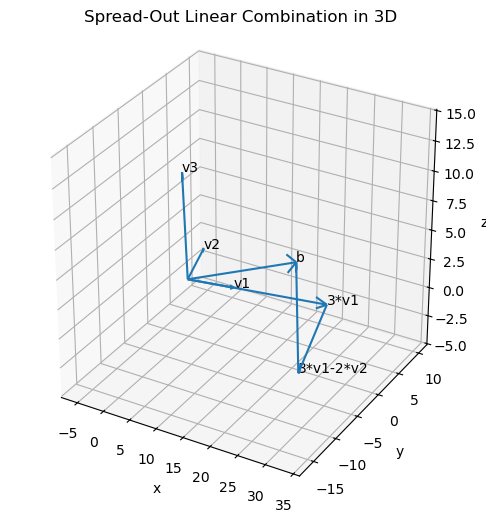

In [15]:
# 3D linear combination (spread-out) + solve Ax = b
# pip install numpy matplotlib

import numpy as np
import matplotlib.pyplot as plt

# --- 1) 문제 세팅 ------------------------------------------------------------
# 열벡터(서로 많이 벌어지게 설계)
v1 = np.array([8.0,  1.0,  0.0])
v2 = np.array([-3.0, 7.0,  0.0])
v3 = np.array([1.0, -2.0, 10.0])

# 계수(해): x=3, y=-2, z=1
c1, c2, c3 = 3.0, -2.0, 1.0

# 목표 벡터 b  = c1*v1 + c2*v2 + c3*v3  = [31, -13, 10]
b = c1*v1 + c2*v2 + c3*v3

# 행렬 A와 해 x
A = np.column_stack([v1, v2, v3])  # [v1 v2 v3]
x = np.array([c1, c2, c3])

# --- 2) Ax=b 검증 ------------------------------------------------------------
sol = np.linalg.solve(A, b)
print("A =\n", A)
print("b =", b)
print("solve(A,b) =", sol)             # -> [ 3. -2.  1.]
print("A @ sol =", A @ sol)            # -> b
print("det(A) =", np.linalg.det(A))    # 비가역 여부 확인
print("inv(A) @ b =", np.linalg.inv(A) @ b)

# --- 3) 3D 시각화 ------------------------------------------------------------
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection="3d")

def arrow3d(a, u, **kwargs):
    """Draw an arrow from point a to a+u."""
    a = np.asarray(a); u = np.asarray(u)
    ax.quiver(a[0], a[1], a[2], u[0], u[1], u[2], arrow_length_ratio=0.08, **kwargs)

# 원점에서 각 열벡터 표시
arrow3d([0,0,0], v1)
ax.text(*v1, "v1")
arrow3d([0,0,0], v2)
ax.text(*v2, "v2")
arrow3d([0,0,0], v3)
ax.text(*v3, "v3")

# 머리-꼬리(head-to-tail)로 선형결합 구성
p1 = c1*v1
p2 = p1 + c2*v2
# 단계별 화살표
arrow3d([0,0,0], p1)       # 3*v1
ax.text(*p1, "3*v1")
arrow3d(p1, c2*v2)         # +(-2)*v2
ax.text(*p2, "3*v1-2*v2")
arrow3d(p2, c3*v3)         # +1*v3

# 결과 b 를 원점에서 그리기
arrow3d([0,0,0], b)
ax.text(*b, "b")

# 보기 좋게 경계 잡기
pts = np.vstack(([0,0,0], v1, v2, v3, p1, p2, b))
mins, maxs = pts.min(axis=0), pts.max(axis=0)
rng = (maxs - mins).max()
pad = 0.15 * max(rng, 1.0)
ax.set_xlim(mins[0]-pad, maxs[0]+pad)
ax.set_ylim(mins[1]-pad, maxs[1]+pad)
ax.set_zlim(mins[2]-pad, maxs[2]+pad)
ax.set_box_aspect((1,1,1))

ax.set_title("Spread-Out Linear Combination in 3D")
ax.set_xlabel("x"); ax.set_ylabel("y"); ax.set_zlabel("z")

plt.show()